<a href="https://colab.research.google.com/github/tdavila28/cauca_piloto/blob/main/Cauca_piloto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectura y preprocesamiento de archivos Cauca (V_ENTREGA)##

#Entorno

In [ ]:
%%capture
!wget https://github.com/tdavila28/cauca_piloto/releases/download/inputs/Cauca_all.zip
!unzip -o /content/Cauca_all.zip
!rm /content/Cauca_all.zip

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

#Librerias e instalación de herramientas

In [ ]:
%%capture
!pip install geopandas
!pip install rasterio
#!pip install richdem


In [ ]:
import osgeo
import geopandas as gp
import numpy as np
from osgeo import gdal
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from osgeo import gdal, ogr,osr

In [ ]:
# explorar archivos
import glob
import os

1. Importar capas_ exploratorias

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [ ]:
#Abrir los tif
import xarray as xr

#Importar capas de información#


In [ ]:
cauca_area=gp.read_file("/content/Cauca_all/limite_cauca.shp")
paramos=gp.read_file("/content/Cauca_all/paramos.shp")
humedales=gp.read_file("/content/Cauca_all/humedales.shp")

In [ ]:
Ramsar=gp.read_file("/content/Cauca_all/RAMSAR.shp")
Amb_RUNAP=gp.read_file("/content/Cauca_all/Runap.shp")
Amb_ley2=gp.read_file("/content/Cauca_all/ley2da.shp")


In [ ]:
Via=gp.read_file("/content/Cauca_all/vias.shp")
Drenaje_sencillo=gp.read_file("/content/Cauca_all/drenaje_sencillo.shp")
Drenaje_doble=gp.read_file("/content/Cauca_all/drenaje_doble.shp")
centro_poblado_mascabeceras=gp.read_file("/content/Cauca_all/cent_pob_cabeceras.shp")

In [ ]:
Comunidades_negras=gp.read_file("/content/Cauca_all/comunid_negras.shp")
Resguardo_Indigena=gp.read_file("/content/Cauca_all/resguardos.shp")

In [ ]:
#Zona_Reserva_Campesina=gp.read_file("/content/Cauca_all/zona_reserva_campesina_Argelia.shp") No hay en la zona de estudio de acuerdo a los mapas. (No es asi en la realidad)
#municipios=gp.read_file("/content/Cauca_all/Muni_Cauca.shp")
#buffer25m=gp.read_file("/content/Cauca_all/Argelia_buffer_25m.shp")

#Operación Geospacial: merge ambiental y social# 

In [ ]:
union_ambiental1=gp.overlay(paramos,humedales, how='union') #se quita Ramsar, es cero. reemplacé por humedales 

<ipython-input-55-792e22f65da9>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 24 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union_ambiental1=gp.overlay(paramos,humedales, how='union') #quitamos Ramsar, es cero. reemplazamos por humedales


In [ ]:
union_ambiental2=gp.overlay(Amb_RUNAP,Amb_ley2, how='union')

<ipython-input-56-c4bebf1db912>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 132 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union_ambiental2=gp.overlay(Amb_RUNAP,Amb_ley2, how='union')


In [ ]:
all_union_amb=gp.overlay(union_ambiental1,union_ambiental2, how='union',keep_geom_type=True)

In [ ]:
all_union_amb.to_file("/content/drive/MyDrive/Cauca_all/ambiental_union_verificacion", index=False)
#all_union_amb.to_file('/vsicurl/https://github.com/tdavila28/cauca_piloto/unionamb/unionamb', index=False)
#print(all_union_amb.head())

In [ ]:
all_union_amb.head()

,OBJECTID_1_1,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha_1,Fecha_Ingr_1,...,area_ha,res_zoni,fecha_ingr,fecha_reco,st_area_sh,st_perimet,Shape_Leng_2_2,Shape_Area_2_2,geometry,valor_comun
0,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4597602.680 1768038.090, 45975...",1
1,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597258.851 1768180.313, 4597291.238...",1
2,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4598017.776 1764188.296, 45980...",1
3,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597804.483 1764288.215, 4597810.123...",1
4,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597709.915 1764023.919, 4597742.436...",1


In [ ]:
all_union_amb.head()

,OBJECTID_1_1,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha_1,Fecha_Ingr_1,...,fecha_ingr,fecha_reco,st_area_sh,st_perimet,Shape_Leng_2_2,Shape_Area_2_2,geometry,area_final,area_m2,valor_comun
0,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4597602.680 1768038.090, 45975...",<function area at 0x7fdabcd67820>,12452.419971,1
1,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597258.851 1768180.313, 4597291.238...",<function area at 0x7fdabcd67820>,175501.019472,1
2,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4598017.776 1764188.296, 45980...",<function area at 0x7fdabcd67820>,6174.755182,1
3,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597804.483 1764288.215, 4597810.123...",<function area at 0x7fdabcd67820>,157011.660405,1
4,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597709.915 1764023.919, 4597742.436...",<function area at 0x7fdabcd67820>,1739.184223,1


CREAMOS UN NUEVO CAMPO COMO UN VALOR COMUN ENTRE TODOS LOS CAMPOS Y POSTERIORMENTE RECALCULAMOS AREA EN M2

In [ ]:
all_union_amb['valor_comun']=1

In [ ]:
from shapely.measurement import area
from shapely.geometry import shape

In [ ]:
for i in range (len(all_union_amb)):
  all_union_amb.loc[i,'area_m2']=shape(all_union_amb.loc[i,'geometry']).area

In [ ]:
all_union_amb.head()
#plot()

,OBJECTID_1_1,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha_1,Fecha_Ingr_1,...,res_zoni,fecha_ingr,fecha_reco,st_area_sh,st_perimet,Shape_Leng_2_2,Shape_Area_2_2,geometry,area_m2,valor_comun
0,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4597602.680 1768038.090, 45975...",12452.419971,1
1,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597258.851 1768180.313, 4597291.238...",175501.019472,1
2,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"MULTIPOLYGON (((4598017.776 1764188.296, 45980...",6174.755182,1
3,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597804.483 1764288.215, 4597810.123...",157011.660405,1
4,7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,2020-07-22,...,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,"POLYGON ((4597709.915 1764023.919, 4597742.436...",1739.184223,1


PROCEDEMOS A DISSOLVER LA CAPA

In [ ]:
ambiental_final=all_union_amb.dissolve(by='valor_comun')

In [ ]:
#ambiental_final.drop('area_final',axis=1,inplace=True)

In [ ]:
ambiental_final.head()

,geometry,OBJECTID_1_1,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha_1,...,nom_ley2,area_ha,res_zoni,fecha_ingr,fecha_reco,st_area_sh,st_perimet,Shape_Leng_2_2,Shape_Area_2_2,area_m2
valor_comun,,,,,,,,,,,,,,,,,,,,,
1,"MULTIPOLYGON (((4455452.564 1820339.666, 44554...",7.0,PD_026,Sotará,100.000,Resolución No. 179 de Febrero 6 de 2018,2018-02-06,0.0,Minambiente,71544.003472,...,Central,1.493062e+06,Resolucion 1922 De 2013 Zonificacion,2022-12-01,2022-12-01,1.214107,19.585527,767961.35174,3.839587e+09,12452.419971


<Axes: >

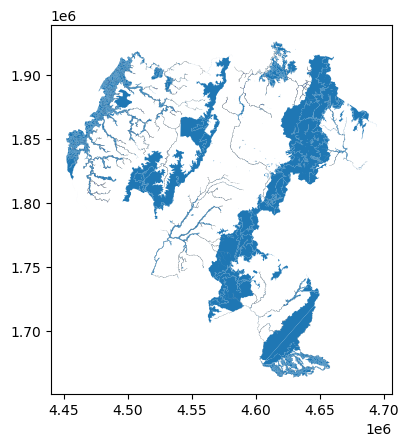

In [ ]:
ambiental_final.plot()

PROCEDEMOS EXPORTAR A LA RUTA DE ALMACENAMIENTO.

In [ ]:
%%capture
ambiental_final.to_file("/content/drive/MyDrive/Cauca_all/ambiental_merged.shp", index=False)

**merge social** 

In [ ]:
social=gp.overlay(Comunidades_negras,Resguardo_Indigena, how='union')

<ipython-input-199-cdd7aa80f0bc>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 764 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  social=gp.overlay(Comunidades_negras,Resguardo_Indigena, how='union')


In [ ]:
social.head()

,OBJECTID_1,NOMBRE_COM,RESOLUCION,AREA_TITUL,ANO,NUMERO_PLA_1,DEPARTAMEN_1,MUNICIPIO_1,CEDULA_CAT_1,MATRICULA__1,...,PUEBLO,DEPARTAMEN_2,MUNICIPIO_2,RESPONSABL_2,AREA_RECON_2,RANGO_TOLE_2,CODIGO_REC_2,SHAPE_Leng_2,SHAPE_Area_2,geometry
0,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,NaN,19,19809,NaN,126-4647,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.304416,0.002687,MULTIPOLYGON Z (((4515396.309 1852303.155 0.00...
1,90.0,Parte Alta Sur Del Río Saija,Resolución 2204 del 3-dic-2002,"19926,5917",2002,NaN,19,TIMBIQUÍ,NaN,126-4646,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.304416,0.002687,MULTIPOLYGON Z (((4505221.015 1861575.457 0.00...
2,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,NaN,19,19809,NaN,126-4647,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4507215.380 1867720.073 0.00...
3,27.0,Parte Baja Del Río Saija,Resolución 2245 del 4-dic-2002,"16115,9229",2002,NaN,19,TIMBIQUÍ,NaN,126-4645,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4497873.218 1873036.869 0.00...
4,90.0,Parte Alta Sur Del Río Saija,Resolución 2204 del 3-dic-2002,"19926,5917",2002,NaN,19,TIMBIQUÍ,NaN,126-4646,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4503334.883 1870529.151 0.00...


In [ ]:
for i in range (len(social)):
  social.loc[i,'area']=shape(social.loc[i,'geometry']).area

In [ ]:
#social['conteo'] = range(len(social))
social['valor_comun'] = 1

In [ ]:
social.head()

,OBJECTID_1,NOMBRE_COM,RESOLUCION,AREA_TITUL,ANO,NUMERO_PLA_1,DEPARTAMEN_1,MUNICIPIO_1,CEDULA_CAT_1,MATRICULA__1,...,MUNICIPIO_2,RESPONSABL_2,AREA_RECON_2,RANGO_TOLE_2,CODIGO_REC_2,SHAPE_Leng_2,SHAPE_Area_2,geometry,conteo,valor_comun
0,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,NaN,19,19809,NaN,126-4647,...,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.304416,0.002687,MULTIPOLYGON Z (((4515396.309 1852303.155 0.00...,0,1
1,90.0,Parte Alta Sur Del Río Saija,Resolución 2204 del 3-dic-2002,"19926,5917",2002,NaN,19,TIMBIQUÍ,NaN,126-4646,...,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.304416,0.002687,MULTIPOLYGON Z (((4505221.015 1861575.457 0.00...,1,1
2,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,NaN,19,19809,NaN,126-4647,...,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4507215.380 1867720.073 0.00...,2,1
3,27.0,Parte Baja Del Río Saija,Resolución 2245 del 4-dic-2002,"16115,9229",2002,NaN,19,TIMBIQUÍ,NaN,126-4645,...,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4497873.218 1873036.869 0.00...,3,1
4,90.0,Parte Alta Sur Del Río Saija,Resolución 2204 del 3-dic-2002,"19926,5917",2002,NaN,19,TIMBIQUÍ,NaN,126-4646,...,TIMBIQUÍ,N/A,0.0,0.0,NaN,0.736792,0.018322,MULTIPOLYGON Z (((4503334.883 1870529.151 0.00...,4,1


In [ ]:
social_final=social.dissolve(by='valor_comun')

In [ ]:
social_final.head()

,geometry,OBJECTID_1,NOMBRE_COM,RESOLUCION,AREA_TITUL,ANO,NUMERO_PLA_1,DEPARTAMEN_1,MUNICIPIO_1,CEDULA_CAT_1,...,PUEBLO,DEPARTAMEN_2,MUNICIPIO_2,RESPONSABL_2,AREA_RECON_2,RANGO_TOLE_2,CODIGO_REC_2,SHAPE_Leng_2,SHAPE_Area_2,conteo
valor_comun,,,,,,,,,,,,,,,,,,,,,
1,MULTIPOLYGON Z (((4472883.329 1794644.805 0.00...,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,013906PS76109,19,19809,197800002000000330078000000000,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,N/A,0.304416,0.002687,0


In [ ]:
social_final.to_file("/content/drive/MyDrive/Cauca_all/social_merged.shp", index=False)

<ipython-input-208-c5a260b520d0>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  social_final.to_file("/content/drive/MyDrive/Cauca_all/social_merged.shp", index=False)


#Lectura y Conversion - Rasterización #

##Conversion Raster - GDAL## (MERGE AMBIENTAL Y SOCIAL)

In [ ]:
from osgeo import gdal, ogr,osr

RASTERIZACIÓN CON EL MERGE AMBIENTAL 

In [ ]:
ambiental_final.head()

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/ambiental_merged.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/merged_ambiental.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_Byte)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID_1']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
ambiental=target_ds.GetRasterBand(1).ReadAsArray()
print('min',ambiental.min(),'max',ambiental.max(),'mean',ambiental.mean())

min 0 max 7 mean 1.1976005363314546


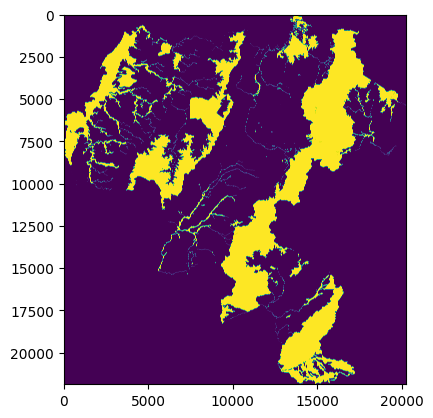

In [ ]:
plt.figure()
plt.imshow(ambiental)

In [ ]:
ambiental.shape

(21871, 20239)

Conversion de raster ambiental a binario (como input de algoritmo)

In [ ]:
bin_ambiental=np.where((ambiental>=np.max(ambiental)),1,0)
print('min',bin_ambiental.min(),'max',bin_ambiental.max(),'mean',bin_ambiental.mean())

min 0 max 1 mean 0.1710857909044935


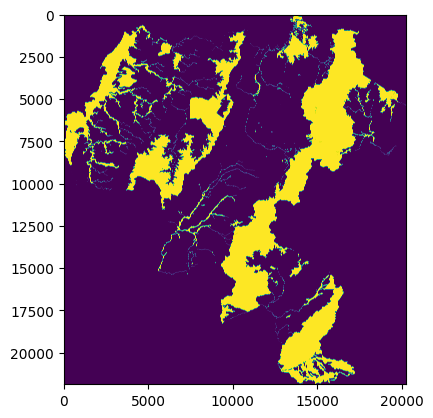

In [ ]:
plt.figure()
plt.imshow(bin_ambiental)

In [ ]:
bin_ambiental.shape

(21871, 20239)

Extracción o almacenamiento en ruta  ## COMO EXTRAER CON GDAL DIRECTAMENTE A LA MAQUINA

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_binAmb = r'/content/drive/MyDrive/Cauca_all/bin_ambiental.tif'

outds=driver.Create(raster_binAmb,xsize=bin_ambiental.shape[1],
                    ysize=bin_ambiental.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_ambiental)
outband.SetNoDataValue(np.nan)

outband=None
outds=None
#outband.FlushCache()

RASTERIZACIÓN CON EL MERGE SOCIAL 

In [ ]:
social_final.head()

,geometry,OBJECTID_1,NOMBRE_COM,RESOLUCION,AREA_TITUL,ANO,NUMERO_PLA_1,DEPARTAMEN_1,MUNICIPIO_1,CEDULA_CAT_1,...,PUEBLO,DEPARTAMEN_2,MUNICIPIO_2,RESPONSABL_2,AREA_RECON_2,RANGO_TOLE_2,CODIGO_REC_2,SHAPE_Leng_2,SHAPE_Area_2,conteo
valor_comun,,,,,,,,,,,,,,,,,,,,,
1,MULTIPOLYGON Z (((4472883.329 1794644.805 0.00...,16.0,La Cuenca Del Río San Bernardo Patía Norte,Resolución 2064 del 18-nov-2002,"25652,3907",2002,013906PS76109,19,19809,197800002000000330078000000000,...,Embera,CAUCA,TIMBIQUÍ,N/A,0.0,0.0,N/A,0.304416,0.002687,0


In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/social_merged.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/social_merged.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_Byte)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID_1']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
social=target_ds.GetRasterBand(1).ReadAsArray()
print('min',social.min(),'max',social.max(),'mean',social.mean())

min 0 max 16 mean 2.335354802641921


In [ ]:
social.shape

(21871, 20239)

In [ ]:
plt.figure()
plt.imshow(social)

CONVERSION DE CAPA SOCIAL BINARIA

In [ ]:
import numpy as np

In [ ]:
bin_social=np.where((social>=np.max(social)),1,0)
print('min',bin_social.min(),'max',bin_social.max(),'mean',bin_social.mean())

min 0 max 1 mean 0.14595967516512007


In [ ]:
bin_social.shape

(21871, 20239)

In [ ]:
plt.figure()
plt.imshow(bin_social)

Extracción o almacenamiento en ruta ## COMO EXTRAER CON GDAL DIRECTAMENTE A LA MAQUINA

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_binSocial = r'/content/drive/MyDrive/Cauca_all/bin_social.tif'

outds=driver.Create(raster_binSocial,xsize=bin_social.shape[1],
                    ysize=bin_social.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_social)
outband.SetNoDataValue(np.nan)

outband=None
outds=None
#outband.FlushCache()

###Rasterización binaria del resto de capas (vias,drenajes,suelos, centros poblados)###

Referencia_ rasterización# (receta)

In [ ]:
# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/paramos.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/paramos.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
band = target_ds.GetRasterBand(1)
band.SetNoDataValue(0)
band=None
target_ds=None

#para verificar valores antes de exportar archivo
#data=target_ds.GetRasterBand(1).ReadAsArray()
#print('min',data.min(),'max',data.max(),'mean',data.mean())

In [ ]:
plt.figure()
plt.imshow(data)

Rasterización binaria de vias#

In [ ]:
Via.head()

In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/vias.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/vias.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(gt)
target_ds.SetProjection(proj)
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
vias=target_ds.GetRasterBand(1).ReadAsArray()
print('min',vias.min(),'max',vias.max(),'mean',vias.mean())

min 0 max 65535 mean 150.79516365324366


In [ ]:
import numpy as np

In [ ]:
bin_vias=np.where((vias>=np.max(vias)),1,0)
print('min',bin_vias.min(),'max',bin_vias.max(),'mean',bin_vias.mean())

min 0 max 1 mean 0.002300654045299


In [ ]:
bin_vias.shape

(21871, 20239)

In [ ]:
plt.figure()
plt.imshow(bin_vias)

Extracción de vias binario a repositorio 

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_binVias = r'/content/drive/MyDrive/Cauca_all/bin_vias.tif'

outds=driver.Create(raster_binVias,xsize=bin_vias.shape[1],
                    ysize=bin_vias.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_vias)
outband.SetNoDataValue(np.nan)

outband=None
outds=None

In [ ]:
Drenaje_sencillo=gp.read_file("/content/Cauca_all/drenaje_sencillo.shp")
Drenaje_doble=gp.read_file("/content/Cauca_all/drenaje_doble.shp")

##UNION y Rasterización DE DRENAJES

In [ ]:
drenaje=gp.overlay(Drenaje_sencillo,Drenaje_doble, how='union',keep_geom_type=True)

In [ ]:
drenaje['valor_comun'] = 1

In [ ]:
drenaje_final.head()

,geometry,OBJECTID_1,NOMBRE_GEO_1,ESTADO_DRE,PROYECTO_1,SYMBOL_1,FECHA_1,DISPERSION,RULEID_1,PK_CUE_1,...,OBJECTID_2,NOMBRE_GEO_2,PROYECTO_2,SYMBOL_2,FECHA_2,RULEID_2,PK_CUE_2,GLOBALID_2,SHAPE_Leng_2,SHAPE_Area
valor_comun,,,,,,,,,,,,,,,,,,,,,
1,"MULTILINESTRING ((4536874.654 1908326.610, 453...",286670.0,Quebrada Patico,5101.0,ARANAJ,2,1899-12-31,0,1.0,1811419.0,...,301.0,Río Naya,ARANAJ,3,1899-12-30,1.0,621292.0,{4D61E133-DBCB-4E78-B5A2-72DD83311EA7},222918.564918,1.280119e+07


In [ ]:
drenaje_final=drenaje.dissolve(by='valor_comun')

In [ ]:
drenaje_final.to_file("/content/drive/MyDrive/Cauca_all/drenaje_merged.shp", index=False)

<ipython-input-32-c2e490c86f13>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  drenaje_final.to_file("/content/drive/MyDrive/Cauca_all/drenaje_merged.shp", index=False)


In [ ]:
drenaje_final.head()

,geometry,OBJECTID_1,NOMBRE_GEO_1,ESTADO_DRE,PROYECTO_1,SYMBOL_1,FECHA_1,DISPERSION,RULEID_1,PK_CUE_1,...,OBJECTID_2,NOMBRE_GEO_2,PROYECTO_2,SYMBOL_2,FECHA_2,RULEID_2,PK_CUE_2,GLOBALID_2,SHAPE_Leng_2,SHAPE_Area
valor_comun,,,,,,,,,,,,,,,,,,,,,
1,"MULTILINESTRING ((4536874.654 1908326.610, 453...",286670.0,Quebrada Patico,5101.0,ARANAJ,2,1899-12-31,0,1.0,1811419.0,...,301.0,Río Naya,ARANAJ,3,1899-12-30,1.0,621292.0,{4D61E133-DBCB-4E78-B5A2-72DD83311EA7},222918.564918,1.280119e+07


In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/drive/MyDrive/Cauca_all/drenaje_merged.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/drenaje.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_UInt16)
target_ds.SetGeoTransform(gt)
target_ds.SetProjection(proj)
options=['ATTRIBUTE=OBJECTID_1']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
drenaje=target_ds.GetRasterBand(1).ReadAsArray()
print('min',drenaje.min(),'max',drenaje.max(),'mean',drenaje.mean())

min 0 max 65535 mean 444.1003643355505


In [ ]:
bin_drenaje=np.where((drenaje>=np.max(drenaje)),1,0)
print('min',bin_drenaje.min(),'max',bin_drenaje.max(),'mean',bin_drenaje.mean())

min 0 max 1 mean 0.006776537183727024


In [ ]:
bin_drenaje.shape

(21871, 20239)

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_bindrenaje = r'/content/drive/MyDrive/Cauca_all/bin_drenaje.tif'

outds=driver.Create(raster_bindrenaje,xsize=bin_drenaje.shape[1],
                    ysize=bin_drenaje.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_drenaje)
outband.SetNoDataValue(np.nan)

outband=None
outds=None
#outband.FlushCache()

##Rasterización y binario de centros poblados

In [ ]:
centro_poblado_mascabeceras=gp.read_file("/content/Cauca_all/cent_pob_cabeceras.shp")

In [ ]:
centro_poblado_mascabeceras.head()

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,CLAS_CCDGO,CLAS_CCNCT,CLAS_NAREA,CLAS_VGNC,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,18,205,18205,2,182052,0.147158,2021,0.030568,539.210057,3.080069e+03,"POLYGON ((4656242.791 1676310.930, 4656238.055..."
1,2,19,001,19001,1,190011,32.335163,2021,0.702000,77943.060406,3.234875e+07,"MULTIPOLYGON (((4595226.476 1829473.614, 45952..."
2,3,19,001,19001,2,190012,5.510520,2021,0.939847,104358.220133,5.512810e+06,"MULTIPOLYGON (((4605351.829 1823624.644, 46053..."
3,4,19,022,19022,1,190221,0.358362,2021,0.031673,3520.839898,3.585745e+05,"POLYGON ((4571369.000 1770274.230, 4571424.387..."
4,5,19,022,19022,2,190222,0.163814,2021,0.049097,5455.363670,1.639104e+05,"MULTIPOLYGON (((4572690.282 1764912.866, 45726..."


In [ ]:
from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/Cauca_all/cent_pob_cabeceras.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/centros_poblados.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_Byte)
target_ds.SetGeoTransform(gt)
target_ds.SetProjection(proj)
options=['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
centros_poblados=target_ds.GetRasterBand(1).ReadAsArray()
print('min',centros_poblados.min(),'max',centros_poblados.max(),'mean',centros_poblados.mean())

min 0 max 91 mean 0.0792384916393761


In [ ]:
bin_centros_poblados=np.where((centros_poblados>np.min(centros_poblados)),1,0)
print('min',bin_centros_poblados.min(),'max',bin_centros_poblados.max(),'mean',bin_centros_poblados.mean())

min 0 max 1 mean 0.0022177211755758457


In [ ]:
bin_centros_poblados.shape

(21871, 20239)

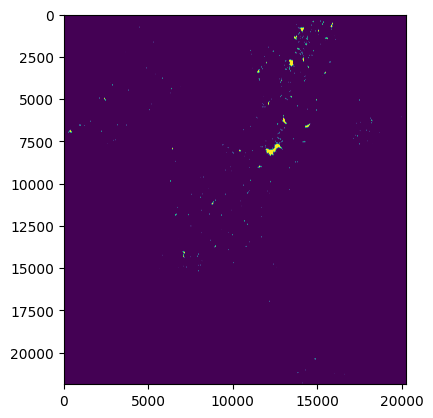

In [ ]:
plt.figure()
plt.imshow(bin_centros_poblados)

Extracción de vias binario a repositorio 

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_bin= r'/content/drive/MyDrive/Cauca_all/bin_centros_poblados.tif'

outds=driver.Create(raster_bin,xsize=bin_centros_poblados.shape[1],
                    ysize=bin_centros_poblados.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_centros_poblados)
outband.SetNoDataValue(np.nan)

outband=None
outds=None

##Rasterización binaria de la mascara del departamento 

In [ ]:
dem = gdal.Open("/content/drive/MyDrive/Cauca_all/dem_cauca.tif")
band=dem.GetRasterBand(1)
array=band.ReadAsArray()

In [ ]:
print('min',array.min(),'max',array.max(),'mean',array.mean())

min -7 max 5415 mean 750.779034766282


In [ ]:
#[np.where((my_array >= min_val) & (my_array <= max_val))]
bin_mask=np.where((array>=(np.min(array)) & (array<=np.max(array))),1,0)
print('min',bin_mask.min(),'max',bin_mask.max(),'mean',bin_mask.mean())

min 0 max 1 mean 0.4827360588161314


Extracción de mascara binaria a maquina

In [ ]:
naip_fn= r'/content/drive/MyDrive/Cauca_all/dem_cauca.tif'
naip_ds=gdal.Open(naip_fn)
gt=naip_ds.GetGeoTransform()
proj=naip_ds.GetProjection()

driver=gdal.GetDriverByName('GTiff')
driver.Register()
raster_bin= r'/content/drive/MyDrive/Cauca_all/bin_mask.tif'

outds=driver.Create(raster_bin,xsize=bin_mask.shape[1],
                    ysize=bin_mask.shape[0],bands=1,eType=gdal.GDT_Byte)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband=outds.GetRasterBand(1)
outband.WriteArray(bin_mask)
outband.SetNoDataValue(np.nan)

outband=None
outds=None

#Exploración y rasterización capas Coberturas y suelos Cauca#

In [ ]:
suelos=gp.read_file("/content/Cauca_all/Suelos_Cauca.shp")
Cobertura_2018=gp.read_file("/content/drive/MyDrive/Cauca_all/Cobertura_Tierra_2018.shp")
#Cobertura_2010_2012=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2010_2012.shp")
#Cobertura_2005_2009=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2005_2009.shp")
Cobertura_2000_2002=gp.read_file("/content/drive/MyDrive/Cauca_all/cob_2000_2002.shp")

<Axes: >

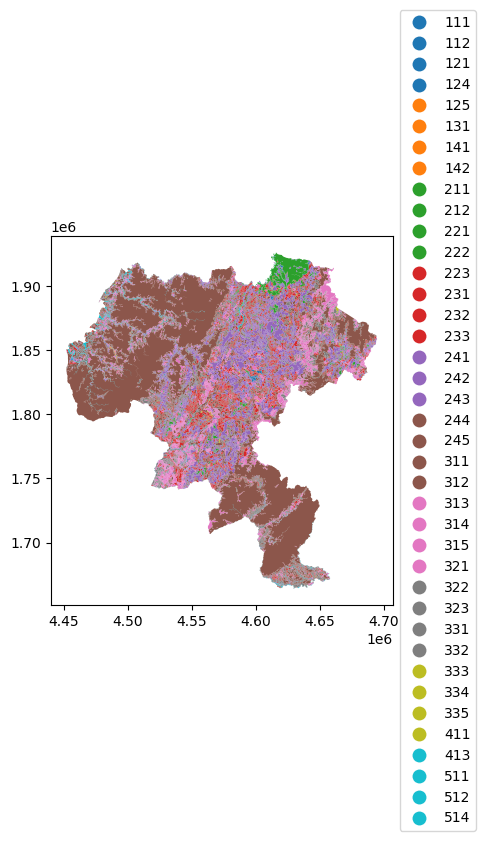

In [ ]:
Cobertura_2018.plot(column='nivel_3',legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [ ]:
Cobertura_2000_2002.plot(column='NIVEL3',legend=True, legend_kwds={'loc': 'center down', 'bbox_to_anchor':(1,0.5)})

In [ ]:
Cobertura_2000_2002.head()

,CODIGO,NIVEL3,LEYENDA,Shape_Area,RULEID,geometry
0,242,2.4.2. Mosaico de pastos y cultivos,2.4.2. Mosaico de pastos y cultivos,0.000020,26,"POLYGON ((4579063.715 1755508.749, 4579070.827..."
1,243,"2.4.3. Mosaico de cultivos, pastos y espacios ...","2.4.3. Mosaico de cultivos, pastos y espacios ...",0.000103,27,"POLYGON ((4579307.707 1755705.318, 4579292.328..."
2,242,2.4.2. Mosaico de pastos y cultivos,2.4.2. Mosaico de pastos y cultivos,0.000750,26,"POLYGON ((4581130.612 1755646.597, 4581078.489..."
3,231,2.3.1. Pastos limpios,2.3.1. Pastos limpios,0.000745,22,"POLYGON ((4578131.319 1757506.034, 4578156.873..."
4,233,2.3.3. Pastos enmalezados,2.3.3. Pastos enmalezados,0.000201,24,"POLYGON ((4582172.196 1765755.426, 4582151.225..."


In [ ]:
Cobertura_2018.shape

(11155, 16)

In [ ]:
Cobertura_2018.describe()

,codigo,Shape_Leng,Shape_Area,ruleid
count,11155.000000,11155.000000,11155.000000,11155.000000
mean,15469.859794,0.167995,0.000426,28.590856
std,64098.170651,2.120138,0.011907,7.249063
min,111.000000,0.008249,0.000004,1.000000
25%,242.000000,0.043954,0.000036,26.000000
50%,244.000000,0.066887,0.000064,28.000000
75%,3222.000000,0.116724,0.000132,35.000000
max,321122.000000,152.607401,0.735840,52.000000


In [ ]:
Cobertura_2018.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11155 entries, 0 to 11154
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   codigo      11155 non-null  int64   
 1   leyenda     11155 non-null  object  
 2   insumo      11155 non-null  object  
 3   apoyo       1465 non-null   object  
 4   confiabili  11155 non-null  object  
 5   cambio      11155 non-null  object  
 6   nivel_1     11155 non-null  object  
 7   nivel_2     11155 non-null  object  
 8   nivel_3     11155 non-null  object  
 9   nivel_4     4092 non-null   object  
 10  nivel_5     818 non-null    object  
 11  nivel_6     467 non-null    object  
 12  Shape_Leng  11155 non-null  float64 
 13  Shape_Area  11155 non-null  float64 
 14  ruleid      11155 non-null  int64   
 15  geometry    11155 non-null  geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 1.4+ MB


##Rasterización y binario de **Suelos** (como coberturas_ shape escalar)

In [ ]:
suelos=gp.read_file("/content/Cauca_all/Suelos_Cauca.shp")

In [ ]:
suelos.head()

,OBJECTID,UCS,UCS_F,PAISAJE,CLIMA,TIPO_RELIE,LITOLOGÍA,CARACTERÍ,CARACTER_1,COMPONENTE,PERFIL,PORCENTAJE,Área_ha,Shape_Leng,Shape_Area,geometry
0,3.0,LUC,LUCe,Lomerío erosional estructural,Cálido muy húmedo,Lomas y colinas,Rocas sedimentaria (limolitas y conglomerados),N/A,"Moderadamente profundos, bien drenados, textur...",Asociación: Humic Dystrudepts; Typic Dystrudepts,P-441; N-59,"50, 50",1868.544173,53304.719360,1.868544e+07,"MULTIPOLYGON (((4532594.700 1901627.448, 45326..."
1,4.0,LUC,LUCd,Lomerío erosional estructural,Cálido muy húmedo,Lomas y colinas,Rocas sedimentaria (limolitas y conglomerados),N/A,"Moderadamente profundos, bien drenados, textur...",Asociación: Humic Dystrudepts; Typic Dystrudepts,P-441; N-59,"50, 50",9.403526,1954.660777,9.403526e+04,"POLYGON ((4535262.636 1907256.445, 4535230.607..."
2,5.0,VUB,VUBa,Valle aluvial,Cálido muy húmedo,Plano de inundación,Depósitos aluviales heterométricos,N/A,"Moderadamente profundos a muy superficiales, p...",Asociación: Fluventic Eutrudepts; Typic Fluvaq...,PN-14; CH-11\n,"50, 50",66.247025,4488.510962,6.624702e+05,"POLYGON ((4540310.581 1908974.893, 4540352.551..."
3,7.0,VUB,VUBa,Valle aluvial,Cálido muy húmedo,Plano de inundación,Depósitos aluviales heterométricos,N/A,"Moderadamente profundos a muy superficiales, p...",Asociación: Fluventic Eutrudepts; Typic Fluvaq...,PN-14; CH-11\n,"50, 50",5415.883525,51850.193028,5.415884e+07,"POLYGON ((4523635.196 1905571.474, 4523655.303..."
4,8.0,VUB,VUBa,Valle aluvial,Cálido muy húmedo,Plano de inundación,Depósitos aluviales heterométricos,N/A,"Moderadamente profundos a muy superficiales, p...",Asociación: Fluventic Eutrudepts; Typic Fluvaq...,PN-14; CH-11\n,"50, 50",0.830261,439.791387,8.302610e+03,"POLYGON ((4526726.514 1904658.815, 4526692.572..."


In [ ]:

from osgeo import gdal, ogr,osr

# Define pixel_size and NoData value of new raster
#pixel_size = 12
NoData_value =-9999

# Filename of input OGR file
train_fn = r'/content/Cauca_all/Suelos_Cauca.shp'
train_ds=ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/drive/MyDrive/Cauca_all/Suelos.tif'

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr=train_ds.GetLayer()
driver=gdal.GetDriverByName('GTiff')
target_ds=driver.Create(raster_fn,naip_ds.RasterXSize,naip_ds.RasterYSize,1,gdal.GDT_Byte)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options=['ATTRIBUTE=OBJECTID_1']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds,[1],lyr,options=options)

#Write data to band 1
#band = target_ds.GetRasterBand(1)
#band.SetNoDataValue(0)
#band=None
#target_ds=None

#para verificar valores antes de exportar archivo
social=target_ds.GetRasterBand(1).ReadAsArray()
print('min',social.min(),'max',social.max(),'mean',social.mean())

#Calculo de distancias (función Proximity)

Hacer binarias las capas para los calculos de proximidad 

transformación binaria del array con la mascara de Cauca

In [ ]:
#input
vias= gdal.Open('/content/drive/MyDrive/Cauca_all/vias.tif')

# Open the data source and read in the extent
naip_fn= r'/content/drive/MyDrive/Cauca_all/cauca_mask.tif'
naip_ds=gdal.Open(naip_fn)

mask_band=naip_ds.GetRasterBand(1)
cols = naip_ds.RasterXSize
rows = naip_ds.RasterYSize

vias_binario=r'/content/drive/MyDrive/Cauca_all/vias_binario.tif'

calc_expression='vias>1'
nodata_value=0

# Create output raster
output_driver = gdal.GetDriverByName('GTiff')
output_raster = output_driver.Create(vias_binario, cols, rows, 1, gdal.GDT_Byte)
output_raster.SetProjection(naip_ds.GetProjection())
output_raster.SetGeoTransform(naip_ds.GetGeoTransform())

# Set the mask for the output raster
output_raster.GetRasterBand(1)

# Perform binary transformation
os.system('gdal_calc.py -A {0} --outfile={1} --calc="{2}" --NoDataValue={3}'.format(vias.GetDescription(), output_raster.GetDescription(), calc_expression, nodata_value))

# Save and close output raster
#output_raster.FlushCache()
output_raster = None


##Cálculo de proximidad#

APLICACIÓN DE FUNCIÓN "gdal.proximity.py". Los raster deben estar binarios para la instrucción del calculo de distancia a los pixeles con valor=1

Distancia a Vias

In [ ]:
import os
from osgeo import gdal

In [ ]:
# input raster file
in_file = "/content/drive/MyDrive/Cauca_all/bin_vias.tif"

# output raster file (proximity distances)
out_file = "/content/drive/MyDrive/Cauca_all/vias_distance.tif"

# distance unit (in pixels)
unit = "PIXEL" #could be in "METERS"

# run gdal_proximity.py as a subprocess
cmd = f"gdal_proximity.py {in_file} {out_file} -values 1 -distunits {unit}"
os.system(cmd)

# read the output raster file into a numpy array
proximity_ds = gdal.Open(out_file)
proximity_arr = proximity_ds.ReadAsArray()
proximity_ds = None  # close the dataset
print('min',proximity_arr.min(),'max',proximity_arr.max(),'mean',proximity_arr.mean())

Distancia a Drenajes (doble y sencillo)

In [ ]:
# input raster file
in_file = "/content/drive/MyDrive/Cauca_all/bin_drenaje.tif"

# output raster file (proximity distances)
out_file = "/content/drive/MyDrive/Cauca_all/drenaje_distance.tif"

# distance unit (in pixels)
unit = "PIXEL" #could be in "METERS"

# run gdal_proximity.py as a subprocess
cmd = f"gdal_proximity.py {in_file} {out_file} -values 1 -distunits {unit}"
os.system(cmd)

# read the output raster file into a numpy array
proximity_ds = gdal.Open(out_file)
proximity_arr = proximity_ds.ReadAsArray()
proximity_ds = None  # close the dataset
print('min',proximity_arr.min(),'max',proximity_arr.max(),'mean',proximity_arr.mean())

min 0.0 max 8759.872 mean 1046.5925


Distancia a Centros Poblados 

In [ ]:
# input raster file
in_file = "/content/drive/MyDrive/Cauca_all/bin_centros_poblados.tif"

# output raster file (proximity distances)
out_file = "/content/drive/MyDrive/Cauca_all/centros_poblados_distance.tif"

# distance unit (in pixels)
unit = "PIXEL" #could be in "METERS"

# run gdal_proximity.py as a subprocess
cmd = f"gdal_proximity.py {in_file} {out_file} -values 1 -distunits {unit}"
os.system(cmd)

# read the output raster file into a numpy array
proximity_ds = gdal.Open(out_file)
proximity_arr = proximity_ds.ReadAsArray()
proximity_ds = None  # close the dataset
print('min',proximity_arr.min(),'max',proximity_arr.max(),'mean',proximity_arr.mean())

min 0.0 max 8813.904 mean 1748.7643


#Visualización del DEM##

In [ ]:
dem = gdal.Open("/content/drive/MyDrive/Cauca_all/dem_cauca.tif")

In [ ]:
proj=dem.GetProjection()
print(proj)

PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["GCS_MAGNA",DATUM["MAGNA",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4],PARAMETER["central_meridian",-73],PARAMETER["scale_factor",0.9992],PARAMETER["false_easting",5000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [ ]:
band=dem.GetRasterBand(1)
array=band.ReadAsArray()

In [ ]:
array.shape

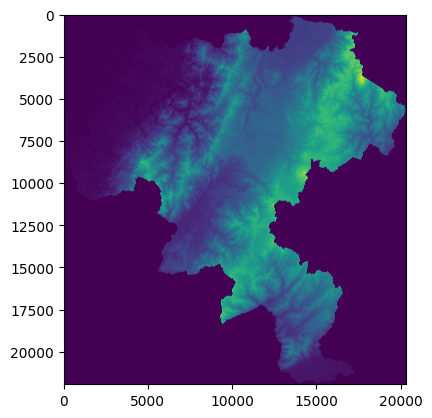

In [ ]:
plt.figure()
plt.imshow(array)
plt.show()

#Calculo Slope with DEM#

Con Gdal 

In [ ]:
import osgeo.gdal as gdal
import subprocess
import os

In [ ]:
print(gdal.__version__) #Se requiere almenos la version 3 de gdal

3.3.2


In [ ]:
dem='/content/drive/MyDrive/Cauca_all/dem_cauca.tif'
slope='/content/drive/MyDrive/Cauca_all/slope_cauca.tif'

In [ ]:
options=gdal.DEMProcessingOptions(slopeFormat='GTiff')


In [ ]:
gdal.DEMProcessing(slope,dem,'slope', options=options)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fcfec357990> >

In [ ]:
slope_array=gdal.Open(slope)
slope_data=slope_array.ReadAsArray()

In [ ]:
slope_data.shape

(21938, 20299)

con Rasterio (Este funciono mejor)

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import rasterio
from rasterio.enums import Resampling

# Set the paths to the input and output files
dem='/content/drive/MyDrive/Cauca_all/dem_cauca.tif'
slope_cauca='/content/drive/MyDrive/Cauca_all/slope_cauca.tif'

# Open the input raster using rasterio
with rasterio.open(dem) as src:
    # Calculate the slope
    slope = src.read(1, masked=True)
    transform = src.transform
    slope_degrees = np.arctan(slope / np.sqrt(transform.a ** 2 + transform.c ** 2)) * (180 / np.pi)

    # Write the output raster using rasterio
    kwargs = src.meta
    kwargs.update(dtype=rasterio.float32, count=1, compress='lzw')
    with rasterio.open(slope_cauca, 'w', **kwargs) as dst:
        dst.write(slope_degrees.astype(rasterio.float32), 1)

# Load the output raster using rasterio
with rasterio.open(slope_cauca) as src:
    slope_data = src.read(1, masked=True)

# Do something with the slope data..